# Basit Lineer Regresyon
Biri bağımlı biri bağımsız iki değişken arasında birbirlerini nasıl etkilediklerini açıklamaya çalışır.

<img src ="lineerReg.png">

# Uygulama

## Veri Hazırlığı ve İncelenmesi

In [75]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("Advertising.csv")
df.drop("Unnamed: 0", axis = 1, inplace=True)

In [76]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [77]:
df.isnull().values.any()
# Eksik gözlem yok

False

In [78]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


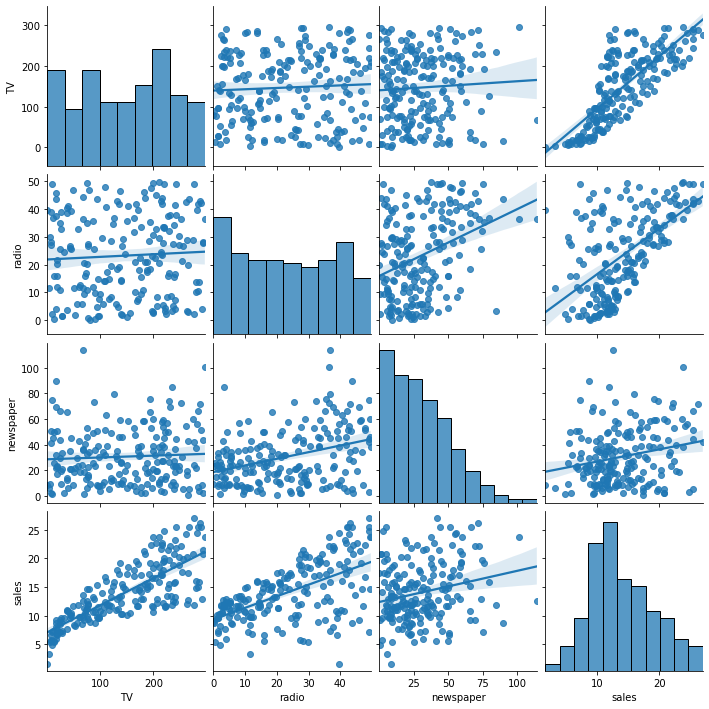

In [79]:
sns.pairplot(df, kind="reg")

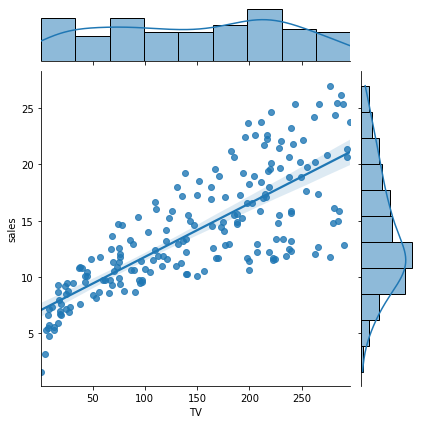

In [80]:
sns.jointplot(x = "TV", y = "sales", data = df, kind = "reg")

### Statsmodel ile Modelleme

In [81]:
import statsmodels.api as sm

In [82]:
# Bağımlı değişken
X = df[["TV"]]

In [83]:
# Fonksiyona gönderebilmek için her değerin 
# başına 1.0 ekleniyor(teknik olarak önemli değil)
X = sm.add_constant(X)

In [84]:
# Bağımsız değişken
y = df["sales"]

In [85]:
lineerModel = sm.OLS(y,X)

In [86]:
model = lineerModel.fit()

In [87]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 12 Jan 2022   Prob (F-statistic):           1.47e-42
Time:                        08:22:40   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
model.summary().tables[1] # Katsayılara ulaşmak

,coef,std err,t,P>|t|,[0.025,0.975]
const,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [122]:
compare = pd.DataFrame(y)
compare["Fitted Values"] = model.fittedvalues[:]
compare["Error"] = abs(compare["sales"] - compare["Fitted Values"])

In [123]:
# Tahmin ve Orijinal Değerler
compare.tail()

,sales,Fitted Values,Error
195,7.6,8.848493,1.248493
196,9.7,11.510545,1.810545
197,12.8,15.446579,2.646579
198,25.5,20.513985,4.986015
199,13.4,18.065848,4.665848


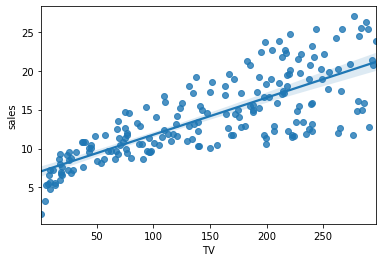

In [92]:
sns.regplot(x ="TV", y="sales", data = df);

## Basit Yol

In [112]:
import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 12 Jan 2022   Prob (F-statistic):           1.47e-42
Time:                        08:33:02   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Tahmin

In [ ]:
from sklearn.linear_model import LinearRegression

In [102]:
reg = LinearRegression()
model2 = reg.fit(df[["TV"]], df["sales"])

In [103]:
model2.predict([[30]])

array([8.45869276])

In [106]:
tahmin_list = [[5],[90],[200]]

In [110]:
model2.predict(tahmin_list)

array([ 7.27027675, 11.31089119, 16.53992164])

# Artıklar

In [117]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [114]:
linearModel = smf.ols("sales ~ TV", df)
model = linearModel.fit()

In [118]:
mse = mean_squared_error(y, model.fittedvalues)
rmse = np.sqrt(mse)

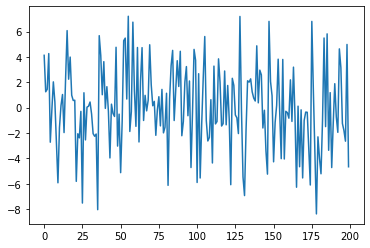

In [126]:
sns.lineplot(x=model.resid.index, y=model.resid);